# Implementação de Chatbot para Atendimento de SAC na Brastel

**Descrição do problema**

*Demanda dos clientes por atendimento SAC é maior do que a capacidade de atendimento da empresa:* A Brastel Co., Ltd., uma empresa especializada em serviços de remessas financeiras no Japão, enfrenta uma alta demanda em seu Serviço de Atendimento ao Cliente (SAC), que realiza mais de 25 mil atendimentos mensais via chat online em vários idiomas. Atualmente, essa demanda excede a capacidade de resposta dos atendentes humanos, o que compromete a eficiência e a qualidade do serviço prestado.

**Objetivo do projeto**

*Implementar um chatbot baseado em inteligência artificial para suprir a demanda de atendimentos:* Para resolver o problema descrito acima, implementaremos um chatbot baseado em inteligência artificial generativa, com o objetivo de melhorar e aumentar a capacidade de atendimento do SAC, permitindo que os atendentes humanos possam focar em casos mais específicos e complexos.

**Benefícios esperados**

1. Aumento da Satisfação do Cliente
2. Foco dos Atendentes Humanos em casos específicos
3. Análise dos problemas para melhoria do serviço
4. Aumento do número de clientes
5. Uso interno

**Perguntas para análise exploratória**

1. Quais são as intenções mais comuns nas interações de chat com os clientes?

<sub><sup>Justificativa: Identificar as intenções mais comuns ajuda a medir a distribuição dos dados, e analisar a necessidade do uso da técnica de data augmentation.</sub></sup>

2. Existem padrões de comprimento nas perguntas ou respostas que se destacam entre diferentes intenções?

<sub><sup>Justificativa: Entender se há padrões de comprimento específicos por intenção, permite identificar se o comprimento da pergunta é uma feature importantte para o modelo e se a resposta deve ser gerada com um comprimento específico.</sup></sub>

3. Quais palavras são mais frequentes nas perguntas e nas respostas?

<sub><sup>Justificativa: Analisar as palavras mais frequentes fornece insights sobre o vocabulário comum dos usuários e das respostas do sistema, permitindo identificar palavras menos relevantes.</sup></sub>
   
4. Para cada intenção, quais são as palavras que aparecem unicamente para essa intenção?

<sub><sup>Justificativa: Identificar palavras exclusivas por intenção permite refinar o modelo de classificação de intenção, adicionando um maior peso para essas palavras e tornando-o mais preciso ao distinguir entre diferentes tipos de interações com base em palavras-chave específicas.</sup></sub>

5. Existem palavras que aparecem apenas 1 única vez? Se sim, quai são elas

<sub><sup>Justificativa: Palavras que aparecem apenas uma vez podem ser ruído ou dados atípicos. Identificá-las pode ajudar a melhorar a limpeza dos dados e a robustez do modelo, eliminando ou tratando esses outliers.</sup></sub>

6. Qual a média do tamanho das perguntas no geral?

<sub><sup>Justificativa: Conhecer a média do tamanho das perguntas ajuda a definir parâmetros para o modelo de NLP, além de permitir a identificação de outliers com maior facilidade, melhorando a eficiência e eficácia do modelo.</sup></sub>

7. Qual a média do tamanho das respostas no geral?

<sub><sup>Justificativa: A média do tamanho das respostas auxilia no ajuste da geração de respostas, garantindo que elas sejam concisas e informativas, mantendo um padrão nas respostas.</sup></sub>

8. Qual a média do tamanho das perguntas por intenção?

<sub><sup>Justificativa: A média por intenção ajuda a personalizar a modelagem para diferentes tipos de perguntas, melhorando a precisão e a eficiência do reconhecimento de intenção e da geração de respostas.</sup></sub>

9. Qual a média do tamanho das respostas por intenção?

<sub><sup>justificativa: Essa métrica permite ajustar o nível de detalhe das respostas geradas para diferentes intenções.</sup></sub>

10. Qual a relação entre o tamanho das perguntas e o tamanho das respostas no geral?

<sub><sup>Justificativa: Entender essa relação pode ajudar a calibrar a quantidade de informação que o sistema deve fornecer com base no comprimento das perguntas, evitando respostas excessivamente longas ou curtas.</sup></sub>

11. Qual a relação entre o tamanho das perguntas e o tamanho das respostas por intenção?

<sub><sup>Justificativa: Entender essa relação específica por intenção pode ajudar a calibrar a quantidade de informação que o sistema deve fornecer com base no comprimento das perguntas, evitando respostas excessivamente longas ou curtas e possivelmente ajudar na predição do modelo.</sup></sub>


# 1. Carregando a base de dados

## 1.1 Conectar com o Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.2 Carregar os dados

### 1.2.1 Dados brutos enviados pelo parceiro

In [ ]:
import pandas as pd

data = pd.read_csv(
    '/content/drive/MyDrive/Dados/raw/Exemplos de chats com clientes.csv')
data2 = pd.read_excel('/content/drive/MyDrive/Dados/raw/Intencoes (Brastel livechat)_r1.xlsx')

data.drop('Unnamed: 0', axis=1, inplace=True)
data.drop('No', axis=1, inplace=True)
data.rename(columns={'Resposta\n': 'Resposta'}, inplace=True)
data2.drop('Unnamed: 0', axis=1, inplace=True)
data2.rename(columns={'Resposta\n': 'Resposta'}, inplace=True)
data2.dropna(inplace=True)

data = pd.concat([data, data2], ignore_index=True)

data['Intencao'] = data['Intencao'].str.strip()
data.dropna(inplace=True)

data

### 1.2.2 Dados com data augmentation

In [ ]:
import pandas as pd

data = pd.read_csv(
    '/content/drive/MyDrive/Dados/raw/Exemplos de chats com clientes.csv')
data2 = pd.read_excel('/content/drive/MyDrive/Dados/raw/Intencoes (Brastel livechat)_r1.xlsx')
data_augmentated_keywords = pd.read_csv('/content/drive/MyDrive/Dados/raw/data_augmented_keywords.csv')

data.drop('Unnamed: 0', axis=1, inplace=True)
data.drop('No', axis=1, inplace=True)
data.rename(columns={'Resposta\n': 'Resposta'}, inplace=True)
data2.drop('Unnamed: 0', axis=1, inplace=True)
data2.rename(columns={'Resposta\n': 'Resposta'}, inplace=True)
data2.dropna(inplace=True)

data = pd.concat([data, data2, data_augmentated_keywords], ignore_index=True)

data['Intencao'] = data['Intencao'].str.strip()
data.dropna(inplace=True)

data

# 2. Análise Exploratória dos Dados

In [1]:
!pip install wordcloud

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

# Configurações gerais para os gráficos
sns.set(style="whitegrid")

<ipython-input-16-3c3dcdf00130>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=intention_counts.values, y=intention_counts.index, palette="viridis")


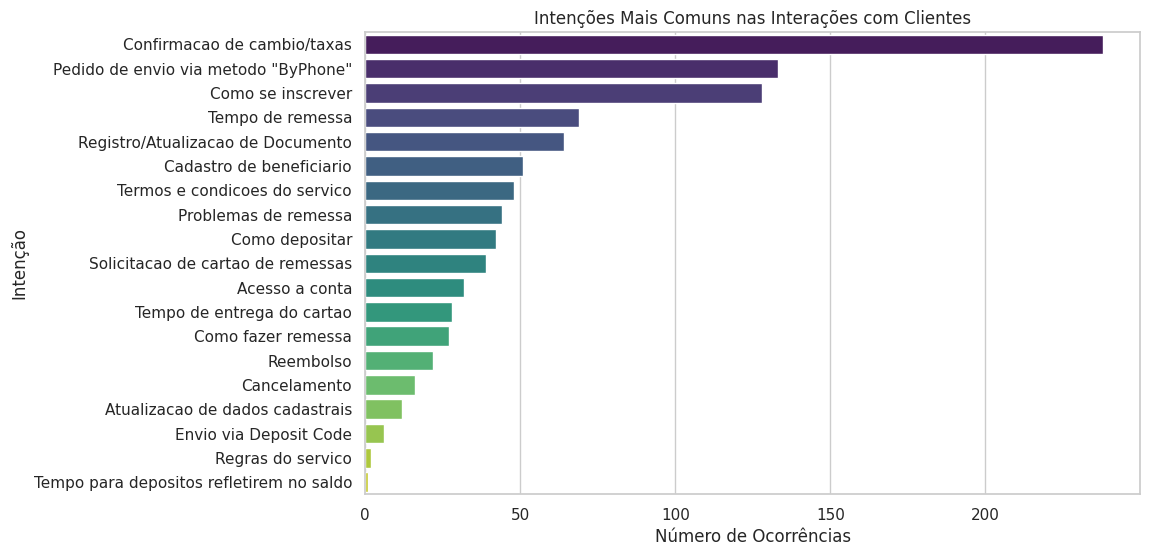

In [16]:
# 1. Quais são as intenções mais comuns nas interações de chat com os clientes?
intention_counts = data['Intencao'].value_counts()

# Gráfico de barras das intenções mais comuns
plt.figure(figsize=(10, 6))
sns.barplot(x=intention_counts.values, y=intention_counts.index, palette="viridis")
plt.title("Intenções Mais Comuns nas Interações com Clientes")
plt.xlabel("Número de Ocorrências")
plt.ylabel("Intenção")
plt.show()


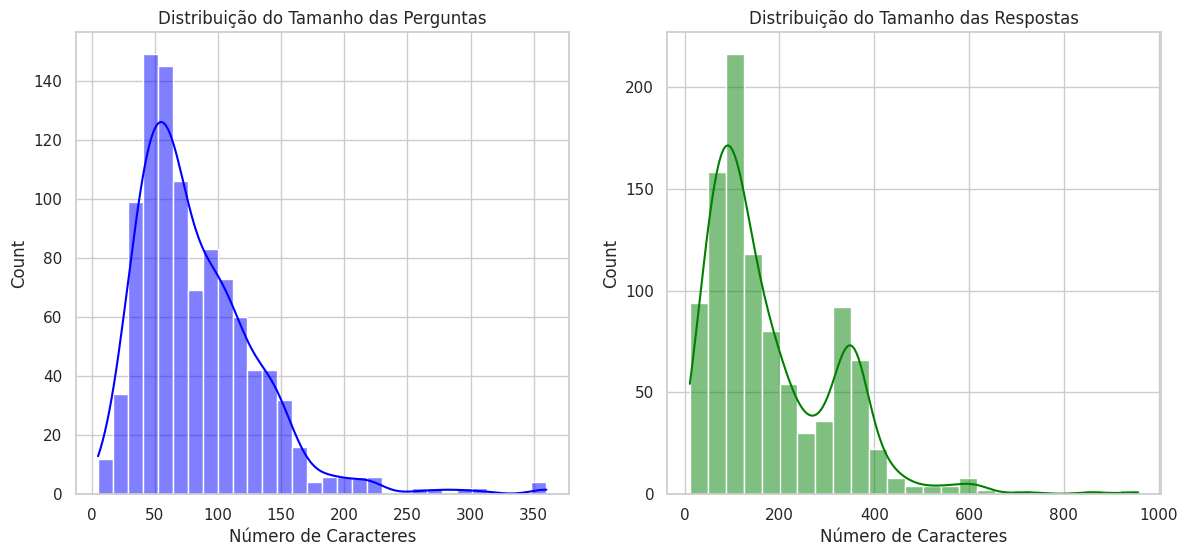

In [17]:
# 2. Padrões de comprimento nas perguntas ou respostas
data['Tamanho_Pergunta'] = data['Pergunta'].apply(len)
data['Tamanho_Resposta'] = data['Resposta'].apply(len)

# Distribuição dos tamanhos das perguntas
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Tamanho_Pergunta'], kde=True, color='blue')
plt.title("Distribuição do Tamanho das Perguntas")
plt.xlabel("Número de Caracteres")

# Distribuição dos tamanhos das respostas
plt.subplot(1, 2, 2)
sns.histplot(data['Tamanho_Resposta'], kde=True, color='green')
plt.title("Distribuição do Tamanho das Respostas")
plt.xlabel("Número de Caracteres")
plt.show()

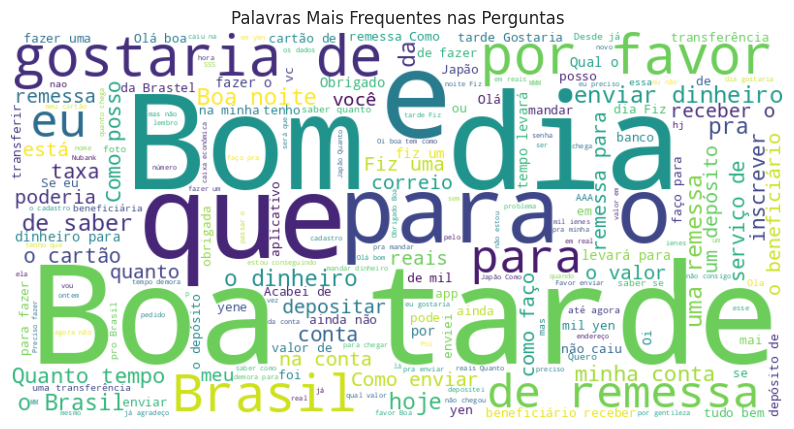

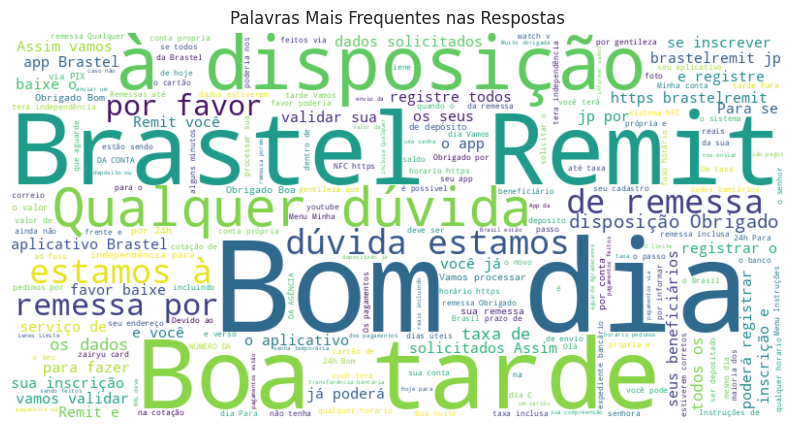

In [18]:
# 3. Quais palavras são mais frequentes nas perguntas e nas respostas?
def gerar_wordcloud(texto, titulo):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(texto))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(titulo)
    plt.axis("off")
    plt.show()

# Wordcloud das perguntas
gerar_wordcloud(data['Pergunta'], "Palavras Mais Frequentes nas Perguntas")

# Wordcloud das respostas
gerar_wordcloud(data['Resposta'], "Palavras Mais Frequentes nas Respostas")

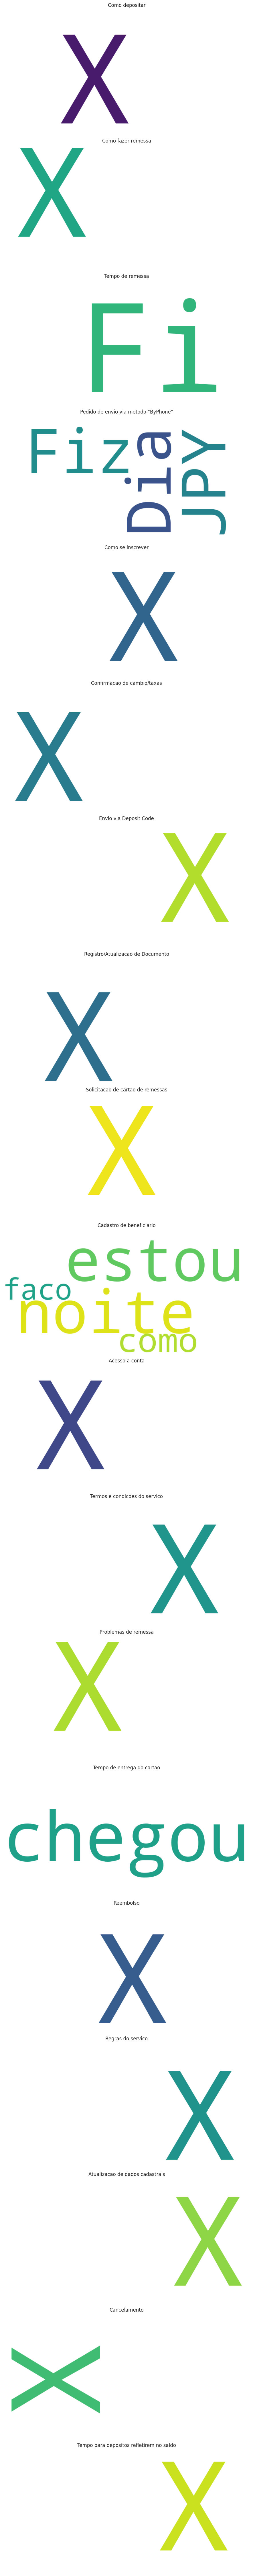

In [19]:
# 4. Para cada intenção, quais são as palavras que aparecem unicamente para essa intenção?

unique_words_per_intent = {}
all_words = ' '.join(data['Pergunta']).split()

for intent in data['Intencao'].unique():
    other_intents_words = ' '.join(data[data['Intencao'] != intent]['Pergunta']).split()
    intent_words = ' '.join(data[data['Intencao'] == intent]['Pergunta']).split()
    word_counts = Counter(all_words)
    unique_words = [word for word, count in word_counts.items() if count == 1 and word in intent_words and word not in other_intents_words]
    unique_words_per_intent[intent] = unique_words
    unique_words_per_intent[intent] = unique_words if unique_words else "X"

fig, axes = plt.subplots(len(unique_words_per_intent), 1, figsize=(10, 90))

for i, (intent, words) in enumerate(unique_words_per_intent.items()):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))

    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f'{intent}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()


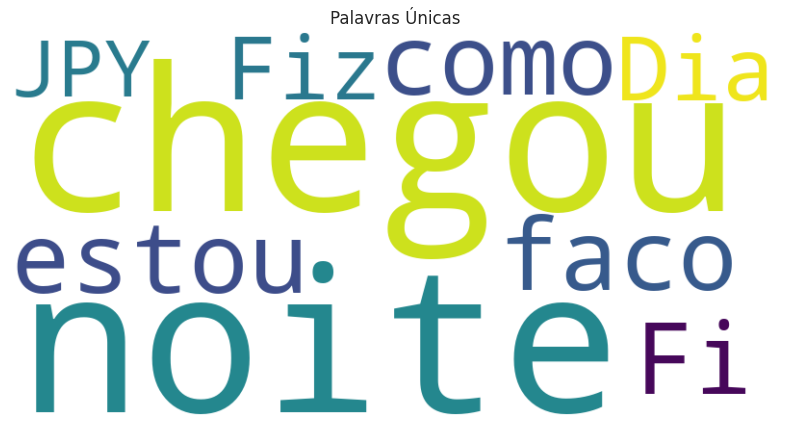

In [20]:
# 5. Existem palavras que aparecem apenas 1 única vez? Se sim, quai são elas

unique_words_per_intent = {}
all_words = ' '.join(data['Pergunta']).split()
word_counts = Counter(all_words)
unique_words = [word for word, count in word_counts.items() if count == 1]

wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(' '.join(unique_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palavras Únicas')
plt.show()

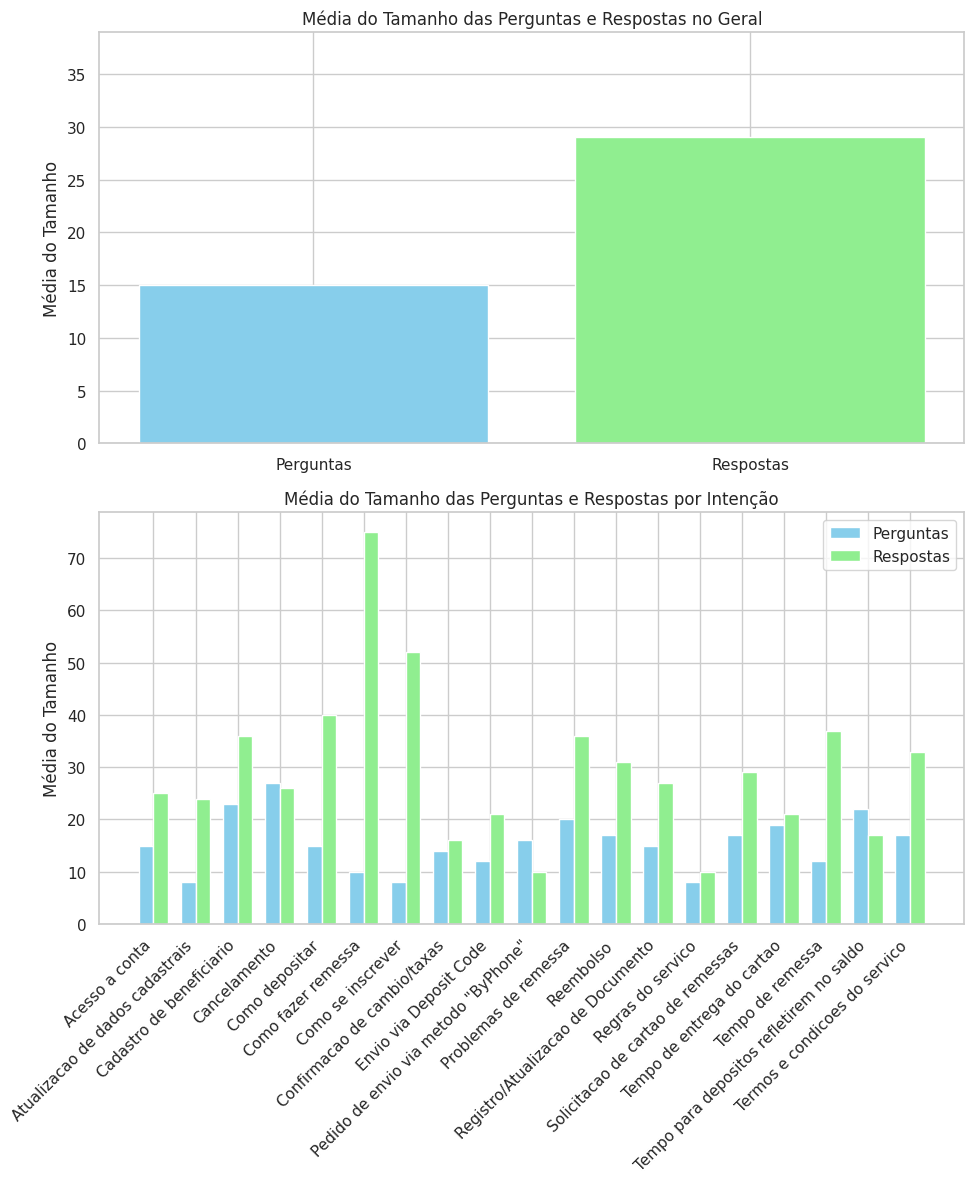

In [21]:
# 6. Qual a média do tamanho das perguntas no geral?
mean_question_length = int(data['Pergunta'].apply(lambda pergunta: len(pergunta.split())).mean())

# 7. Qual a média do tamanho das respostas no geral?
mean_answer_length = int(data['Resposta'].apply(lambda resposta: len(resposta.split())).mean())

# 8. Qual a média do tamanho das perguntas por intenção?
mean_question_length_by_intent = data.groupby('Intencao')['Pergunta'].apply(lambda perguntas: perguntas.apply(lambda pergunta: len(pergunta.split())).mean()).astype(int)

# 9. Qual a média do tamanho das respostas por intenção?
mean_answer_length_by_intent = data.groupby('Intencao')['Resposta'].apply(lambda respostas: respostas.apply(lambda resposta: len(resposta.split())).mean()).astype(int)

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

axs[0].bar(['Perguntas', 'Respostas'], [mean_question_length, mean_answer_length], color=['skyblue', 'lightgreen'])
axs[0].set_title('Média do Tamanho das Perguntas e Respostas no Geral')
axs[0].set_ylabel('Média do Tamanho')
axs[0].set_ylim(0, max(mean_question_length, mean_answer_length) + 10)

width = 0.35
intents = mean_question_length_by_intent.index
x = range(len(intents))

axs[1].bar(x, mean_question_length_by_intent, width, label='Perguntas', color='skyblue')
axs[1].bar([p + width for p in x], mean_answer_length_by_intent, width, label='Respostas', color='lightgreen')

axs[1].set_title('Média do Tamanho das Perguntas e Respostas por Intenção')
axs[1].set_ylabel('Média do Tamanho')
axs[1].set_xticks([p + width / 2 for p in x])
axs[1].set_xticklabels(intents, rotation=45, ha="right")
axs[1].legend()

plt.tight_layout()
plt.show()

In [22]:
import seaborn as sns

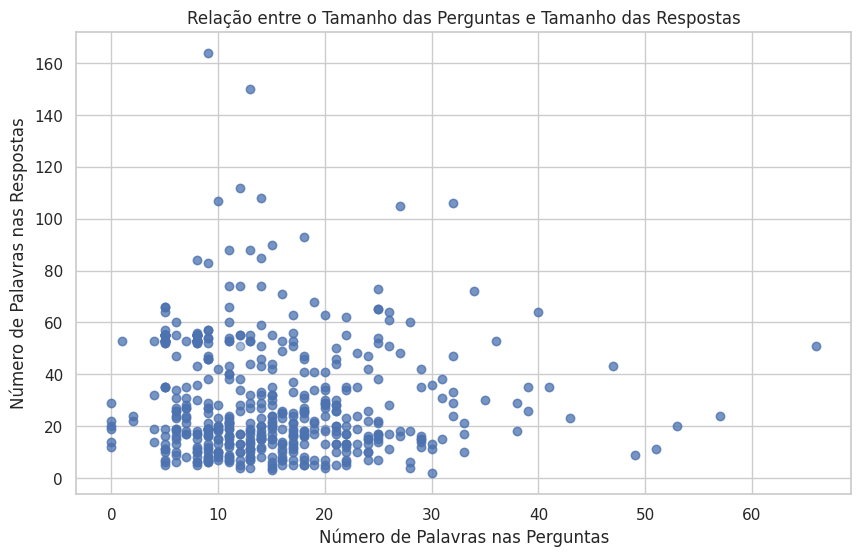

In [23]:
# 10. Qual a relação entre o tamanho das perguntas e o tamanho das respostas no geral?

data['Pergunta_length'] = data['Pergunta'].apply(lambda pergunta: len(pergunta.split()))
data['Resposta_length'] = data['Resposta'].apply(lambda resposta: len(resposta.split()))

plt.figure(figsize=(10, 6))
plt.scatter(data['Pergunta_length'], data['Resposta_length'], alpha=0.5)
plt.xlabel('Número de Palavras nas Perguntas')
plt.ylabel('Número de Palavras nas Respostas')
plt.title('Relação entre o Tamanho das Perguntas e Tamanho das Respostas')
plt.grid(True)
plt.show()

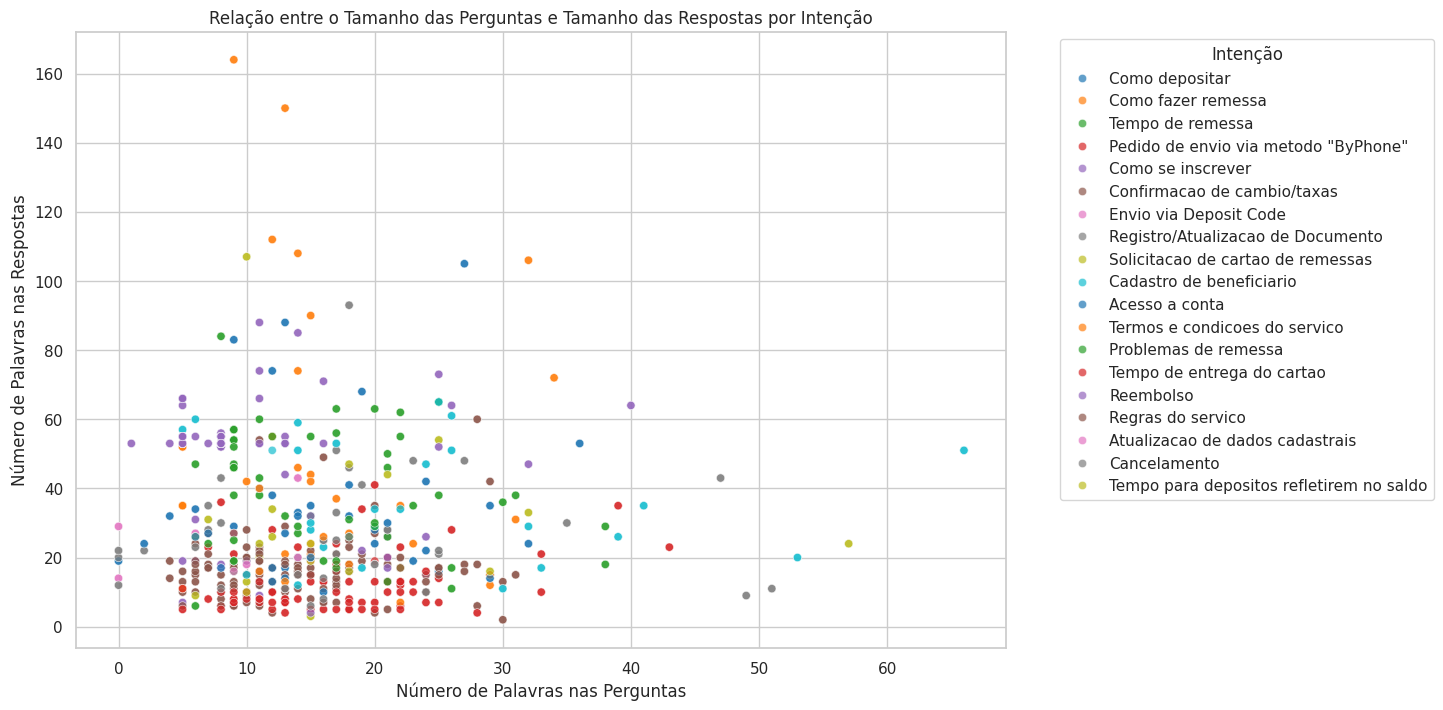

In [24]:
# 11. Qual a relação entre o tamanho das perguntas e o tamanho das respostas por intenção?

data['Question_length'] = data['Pergunta'].apply(lambda pergunta: len(pergunta.split()))
data['Answer_length'] = data['Resposta'].apply(lambda resposta: len(resposta.split()))

plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Question_length', y='Answer_length', hue='Intencao', alpha=0.7, palette='tab10')
plt.xlabel('Número de Palavras nas Perguntas')
plt.ylabel('Número de Palavras nas Respostas')
plt.title('Relação entre o Tamanho das Perguntas e Tamanho das Respostas por Intenção')
plt.legend(title='Intenção', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# 3. Funções de Pré-Processamento

## 3.1. Importar bibliotecas

In [25]:
!python -m spacy download pt_core_news_sm
!pip install language_tool_python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 63.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [26]:
import spacy
from difflib import SequenceMatcher
import string
import re

nlp = spacy.load('pt_core_news_sm')

INFO:language_tool_python.download_lt:Unzipping /tmp/tmp8hbfvwj5.zip to /root/.cache/language_tool_python.
INFO:language_tool_python.download_lt:Downloaded https://www.languagetool.org/download/LanguageTool-6.4.zip to /root/.cache/language_tool_python.


## 3.2. Remover pontuação

In [27]:
def remove_punctuation(text):
  text = re.sub("[^\w]", " ",  text)

  return text

## 3.3. Tokenização

In [28]:
def tokenize_text(text):
    return [token.text for token in nlp(text)]

## 3.4. Remover Stopwords

In [29]:
def remove_stopwords(tokens):
    return [token for token in tokens if not nlp.vocab[token].is_stop]

## 3.5. Lematização

In [30]:
def lemmatize_text(tokens):
    tokens_lower = [token.lower() for token in tokens]
    return [token.lemma_ for token in nlp(" ".join(tokens_lower))]

## 3.6. Remover campos vazios

In [31]:
def clean_text(tokens):
    cleaned_array = [s for s in tokens if s.strip()]
    return cleaned_array

## 3.6. Testes das Funções de Pré-processamento

In [32]:
def test_remove_punctuation():
    assert remove_punctuation("Olá.Bem?") == 'Olá Bem ', "Erro na remoção de pontuação"

def test_tokenize_text():
    assert tokenize_text("Olá, tudo bem?") == ['Olá', ',', 'tudo', 'bem', '?'], "Erro na tokenização"

def test_remove_stopwords():
    assert remove_stopwords(['Olá', ',', 'tudo', 'bem', '?']) == ['Olá', ',', '?'], "Erro na remoção de stopwords"

def test_lemmatize_text():
    assert lemmatize_text(['caminhando', 'pelas', 'ruas']) == ['caminhar', 'por o', 'rua'], "Erro na lematização"

def test_clean_text():
    assert clean_text(['Olá', '    ', 'Caminhar', 'rua']) == ['Olá', 'Caminhar', 'rua'], "Erro na limpeza dos tokens"

In [33]:
# Executar os testes
test_remove_punctuation()
test_tokenize_text()
test_remove_stopwords()
test_lemmatize_text()
test_clean_text()

print("Todos os testes passaram com sucesso!")

Todos os testes passaram com sucesso!


# 4. Função de pipeline de pré-processamento

## 4.1. Função

In [34]:
def preprocess_pipeline(text):
    text_no_punctuation = remove_punctuation(text)
    tokens = tokenize_text(text_no_punctuation)
    tokens = remove_stopwords(tokens)
    tokens = lemmatize_text(tokens)
    tokens = clean_text(tokens)
    return tokens

## 4.2. Testes

In [35]:
def test_preprocess_pipeline():
    text = "Olá, tudo bem? Caminhando pelas ruas."
    result = preprocess_pipeline(text)
    expected = ['olá', 'caminhar', 'rua']
    assert result == expected, f"Erro no pipeline de pré-processamento: {result} != {expected}"

In [36]:
test_preprocess_pipeline()

print("Todos os testes passaram com sucesso!")

Todos os testes passaram com sucesso!


# 5. Pipeline de pré-processamento para processar a base de dados textuais

In [37]:
# Aplicar o pipeline de pré-processamento ao dataframe
data['processed_pergunta'] = data['Pergunta'].apply(preprocess_pipeline)
data['processed_resposta'] = data['Resposta'].apply(preprocess_pipeline)

# 6 Embeddings


## 6.1 Função de embedding

In [39]:
from transformers import AutoTokenizer, AutoModel
import torch

tokenizer = AutoTokenizer.from_pretrained("neuralmind/bert-base-portuguese-cased")
model = AutoModel.from_pretrained("neuralmind/bert-base-portuguese-cased")
model = model.to('cuda')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/647 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/210k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

In [40]:
def embed_tokens(tokens):
    sentence = " ".join(tokens)
    inputs = tokenizer(sentence, return_tensors="pt", truncation=True, padding=True, max_length=128)
    inputs = {k: v.to('cuda') for k, v in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1)
    return embeddings.squeeze().cpu().numpy()

In [41]:
def embed_text(text):
    preprocessed_text = preprocess_pipeline(text)
    embedded_text = embed_tokens(preprocessed_text)
    return embedded_text

## 6.2 Embedding dataframe

In [ ]:
data['perguntas_embedding'] = data['Pergunta'].apply(embed_text)
data['respostas_embedding'] = data['Resposta'].apply(embed_text)

data

## 6.3 Salvamento do dataframe

In [43]:
data.to_csv('/content/drive/MyDrive/Dados/Dados_processados.csv', index=False)